In [1]:
import pandas as pd
import numpy as np

house = pd.read_csv("./kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
house = house.drop(['id', 'date'],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print (house.size)

410647


In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(house, test_size=0.2, random_state=42) 
featureTrain = train.iloc[:, 1:]
featureTest = test.iloc[:, 1:]
valTrain = train.iloc[:, 0]
valTest = test.iloc[:, 0]

print (type(valTest))

<class 'pandas.core.series.Series'>


Root mean squared error: 526.200877


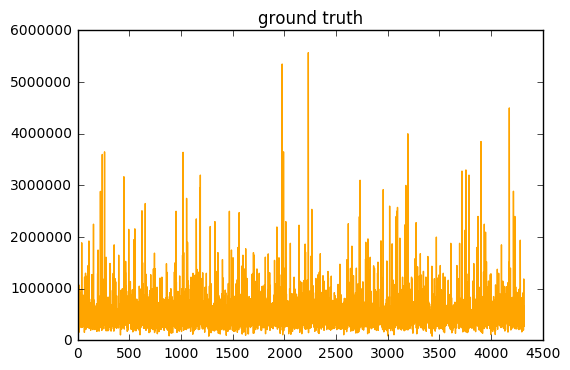

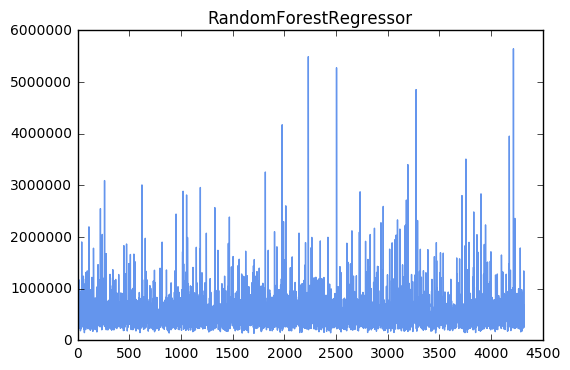

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
regForest = RandomForestRegressor(random_state=0)
regForest.fit(featureTrain, valTrain).predict(featureTest)
predictVal = regForest.predict(featureTest)

print("Root mean squared error: %.6f"
      % np.sqrt(np.mean(predictVal - valTest) ** 2))


plt.figure()
plt.plot(np.array(valTest), color="orange")
plt.title("ground truth")
plt.show()

plt.figure()
plt.plot(predictVal, color='cornflowerblue')
plt.title("RandomForestRegressor")
plt.show()

In [19]:
#Ordinary Least Squares, Ridge Regression, Bayesian Linear Regression, Partial Least Squares Regression, Polynomial Regression, Support Vector Regression, Decision Tree Regression, and Random Forest Regression

In [20]:
#Ordinary Least Squares
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (featureTrain, valTrain)
predictValX = reg.predict(featureTest)
print (predictVal.size)
print(type(predictVal))
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean(predictValX - valTest) ** 2))
#print (valTest)
#print (predictVal)

4323
<class 'numpy.ndarray'>
Root mean squared error: 3145.212396


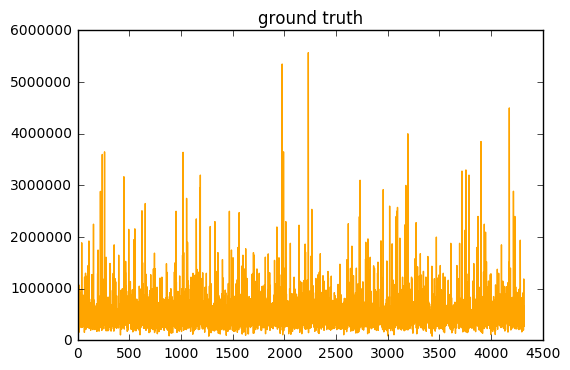

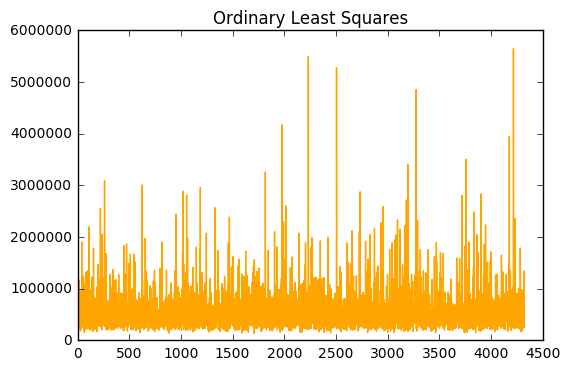

In [21]:

plt.figure()
#plt.scatter(featureTest, valTest, c="darkorange", label="data")
plt.plot(np.array(valTest), color="orange")
#plt.plot(predictVal, color="cornflowerblue", linewidth=2)
#plt.xlabel("houses")
#plt.ylabel("prices")
plt.title("ground truth")
#plt.legend()
plt.show()


plt.figure()
#plt.scatter(featureTest, valTest, c="darkorange", label="data")
plt.plot(predictVal, color="orange")
#plt.plot(predictVal, color="cornflowerblue", linewidth=2)
#plt.xlabel("houses")
#plt.ylabel("prices")
plt.title("Ordinary Least Squares")
#plt.legend()
plt.show()


Root mean squared error: 3147.731171


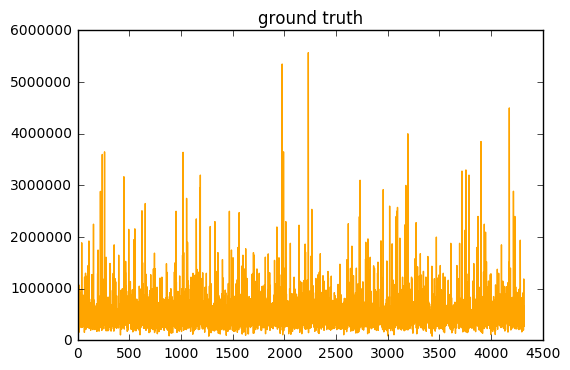

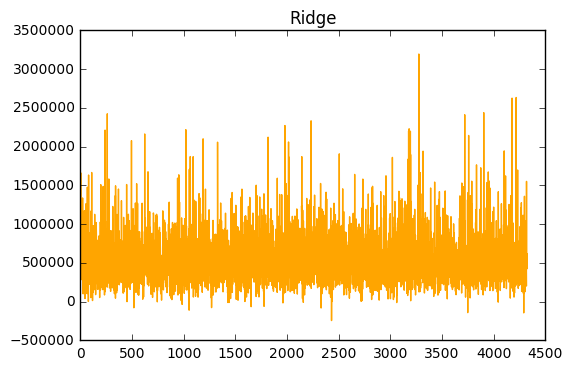

In [22]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(featureTrain, valTrain)  
predictVal0 = reg.predict(featureTest)

print("Root mean squared error: %.6f"
      % np.sqrt(np.mean(predictVal0 - valTest) ** 2))

plt.figure()
plt.plot(np.array(valTest), color="orange")
plt.title("ground truth")
plt.show()


plt.figure()
plt.plot(predictVal0, color="orange")
plt.title("Ridge")
plt.show()


Root mean squared error: 3149.893813


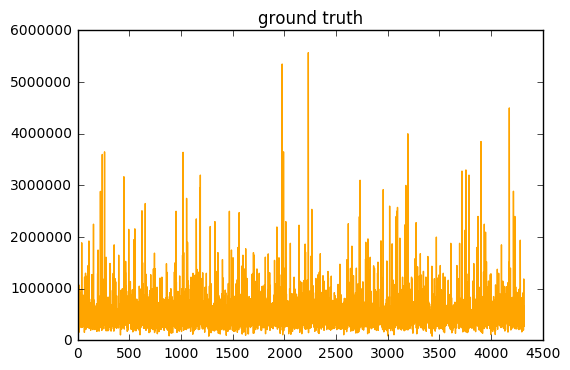

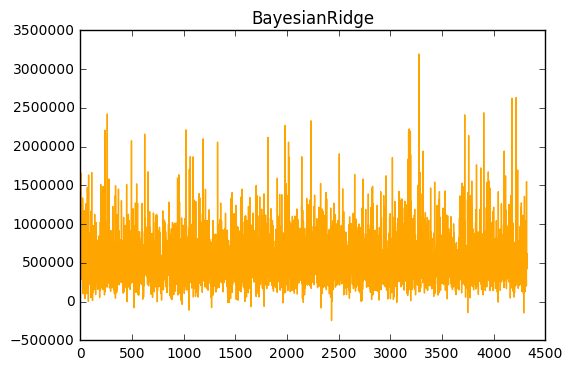

In [24]:
reg = linear_model.BayesianRidge()
reg.fit(featureTrain, valTrain)  
predictVal1 = reg.predict(featureTest)

print("Root mean squared error: %.6f"
      % np.sqrt(np.mean(predictVal1 - valTest) ** 2))


plt.figure()
plt.plot(np.array(valTest), color="orange")
plt.title("ground truth")
plt.show()


plt.figure()
plt.plot(predictVal1, color="orange")
plt.title("BayesianRidge")
plt.show()




Root mean squared error: 2913.112191


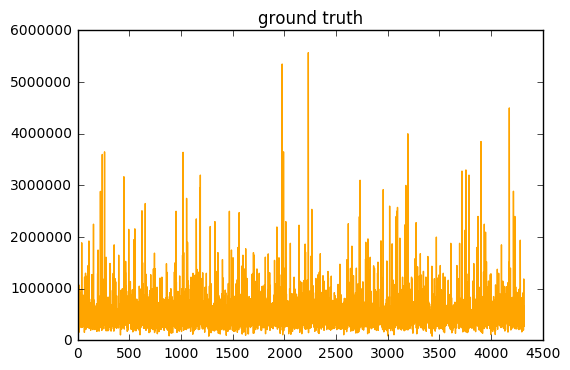

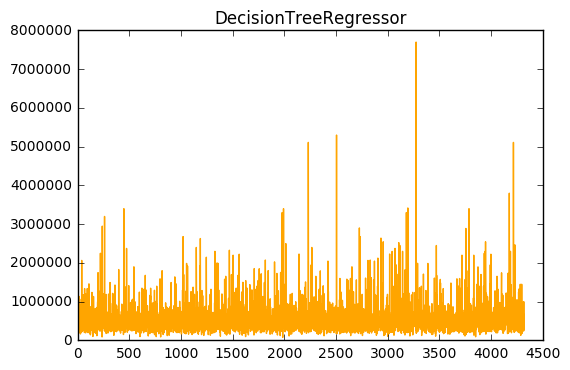

In [26]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()
regr_1.fit(featureTrain, valTrain)
predictVal2 = regr_1.predict(featureTest)

print("Root mean squared error: %.6f"
      % np.sqrt(np.mean(predictVal2 - valTest) ** 2))

plt.figure()
plt.plot(np.array(valTest), color="orange")
plt.title("ground truth")
plt.show()


plt.figure()
plt.plot(predictVal2, color="orange")
plt.title("DecisionTreeRegressor")
plt.show()

In [12]:
'''
from sklearn.svm import SVR
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#y_rbf = svr_rbf.fit(featureTrain, valTrain).predict(featureTest)
#y_lin = svr_lin.fit(featureTrain, valTrain).predict(featureTest)
y_poly = svr_poly.fit(featureTrain, valTrain).predict(featureTest)

plt.figure()
plt.plot(np.array(valTest), color="orange")
plt.title("ground truth")
plt.show()


plt.figure()
plt.plot(y_rbf, color='navy', lw=lw)
plt.title("SVM- RBF model")
plt.show()

plt.figure()
plt.plot(y_lin, color='c', lw=lw)
plt.title("SVM- Linear model")
plt.show()


plt.figure()
plt.plot(y_poly, color='cornflowerblue')
plt.title("SVM- Polynomial model")
plt.show()
'''

'\nfrom sklearn.svm import SVR\n#svr_rbf = SVR(kernel=\'rbf\', C=1e3, gamma=0.1)\n#svr_lin = SVR(kernel=\'linear\', C=1e3)\nsvr_poly = SVR(kernel=\'poly\', C=1e3, degree=2)\n#y_rbf = svr_rbf.fit(featureTrain, valTrain).predict(featureTest)\n#y_lin = svr_lin.fit(featureTrain, valTrain).predict(featureTest)\ny_poly = svr_poly.fit(featureTrain, valTrain).predict(featureTest)\n\nplt.figure()\nplt.plot(np.array(valTest), color="orange")\nplt.title("ground truth")\nplt.show()\n\n\nplt.figure()\nplt.plot(y_rbf, color=\'navy\', lw=lw)\nplt.title("SVM- RBF model")\nplt.show()\n\nplt.figure()\nplt.plot(y_lin, color=\'c\', lw=lw)\nplt.title("SVM- Linear model")\nplt.show()\n\n\nplt.figure()\nplt.plot(y_poly, color=\'cornflowerblue\')\nplt.title("SVM- Polynomial model")\nplt.show()\n'

In [6]:
import folium # for map visualization
from folium import plugins
import pandas as pd

data = pd.read_csv("./kc_house_data.csv", parse_dates = ['date'])
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['zipcode'] = data['zipcode'].astype(str)
data = data.sort('date')
data.head(2) # Show the first 2 lines

houses_map = folium.Map(location = [data['lat'].mean(), data['long'].mean()], zoom_start = 10)
marker_cluster = folium.MarkerCluster().add_to(houses_map)
MAX_RECORDS = 100
for name, row in data.iterrows():
    folium.Marker([row["lat"], row["long"]], 
                  popup="Sold for {0}$ on: {1}. Features: {2} sqft, {3} bedrooms, {4} bathrooms, year built: {5}"\
                  .format(row["price"], row["date"], row['sqft_living'], 
                          row['bedrooms'], row['bathrooms'], row['yr_built'])).add_to(marker_cluster)


/Users/dianelai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [3]:
houses_map.save('houses.html')
houses_map

AttributeError: 'Map' object has no attribute 'create_map'

In [30]:
import numpy as np
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
zipcode_data.head(5)

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,1721.325967,179.530387,1980.679558,43.801105,47.309020,-122.270646,1828.856354,11214.403315,362
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,1522.537688,105.206030,1967.773869,59.889447,47.308780,-122.213357,1479.030151,7585.482412,199
2,98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,1663.550000,265.332143,1976.885714,21.360714,47.315741,-122.310054,1876.196429,9746.178571,280
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082,317
4,98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,2160.196429,496.607143,1969.744048,47.630952,47.611532,-122.167268,2567.863095,18367.773810,168


In [31]:
geo_path = 'zipcode_king_county.geojson'
zipcode = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=9)
zipcode.choropleth(geo_path = geo_path,
                     data=zipcode_data, 
                     columns = ['zipcode', 'price'], key_on='feature.properties.ZCTA5CE10',
                 fill_color='OrRd', fill_opacity=0.9,line_opacity=0.2)
zipcode.save('price' + '.html')